# Exploratory Data Analysis

- The goal of this notebook is to find interesting relationships in the data that can be considered when building a model
- Key links:

[Read Dataset](#Read-Dataset)  
[Overivew of Dataset](#Overview-of-Dataset)  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd 
import pandas as pd
import numpy as np
from IPython.display import Markdown
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


## Read Dataset



In [2]:
data=pd.read_csv("Data/hospital_readmissions.csv")

## Overview of Dataset

[Back to top](#Exploratory-Data-Analysis)  

This dataset consists of 17 variables, and the target variable is the readmitted (Y/N). There are 9 strings and 7 numeric variables. There are 25000 rows and there is no null or missing values in the dataset. 

#### 1) age - age bracket of the patient
#### 2) time_in_hospital - days (from 1 to 14)
#### 3) n_procedures - number of procedures performed during the hospital stay
#### 4) n_lab_procedures - number of laboratory procedures performed during the hospital stay
#### 5) n_medications - number of medications administered during the hospital stay
#### 6) n_outpatient - number of outpatient visits in the year before a hospital stay
#### 7) n_inpatient - number of inpatient visits in the year before the hospital stay
#### 8) n_emergency- number of visits to the emergency room in the year before the hospital stay
#### 9) medical_specialty" - the specialty of the admitting physician
#### 10) diag_1 - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
#### 11) diag_2 - secondary diagnosis
#### 12) diag_3 - additional secondary diagnosis
#### 13) glucose_test - whether the glucose serum came out as high (> 200), normal, or not performed
#### 14) A1Ctest - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
#### 15) change - whether there was a change in the diabetes medication ('yes' or 'no')
#### 16) diabetes_med - whether a diabetes medication was prescribed ('yes' or 'no')
#### 17) readmitted - if the patient was readmitted at the hospital ('yes' or 'no')

In [3]:
print(f"\033[1mDataset Shape:\033[0m {data.shape}")


Dataset Shape: (25000, 17)


### First five rows of the dataset

In [4]:
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [5]:
num_cols, num_rows = data.shape

num_cols=data.shape[1]
num_rows=data.shape[0]
Markdown(f"""
**- The number of columns is:**{num_cols:,.0f}\n
**- The number of rows is:** {num_rows}
""")


**- The number of columns is:**17

**- The number of rows is:** 25000


In [6]:
# Summary in a DataFrame
data_summary = pd.DataFrame({
    "Column": data.columns,
    "Data Type": data.dtypes,
    "Missing Values": data.isnull().sum()
})
data_summary.reset_index(drop=True, inplace=True)
data_summary

,Column,Data Type,Missing Values
0,age,object,0
1,time_in_hospital,int64,0
2,n_lab_procedures,int64,0
3,n_procedures,int64,0
4,n_medications,int64,0
5,n_outpatient,int64,0
6,n_inpatient,int64,0
7,n_emergency,int64,0
8,medical_specialty,object,0
9,diag_1,object,0


### Check for null values

In [7]:
print(data.isnull().sum())

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


In [8]:
# Descriptive statistics
# Numerical columns summary
print("\033[1mNumerical columns summary:\033[0m")
print(data.describe())

# Categorical columns summary
print("\033[1mCategorical columns summary:\033[0m")
for col in data.select_dtypes(include=('object')):
    print(f"\033[1m{col}:\033[0m")
    print(data[col].value_counts())

Numerical columns summary:
       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%   

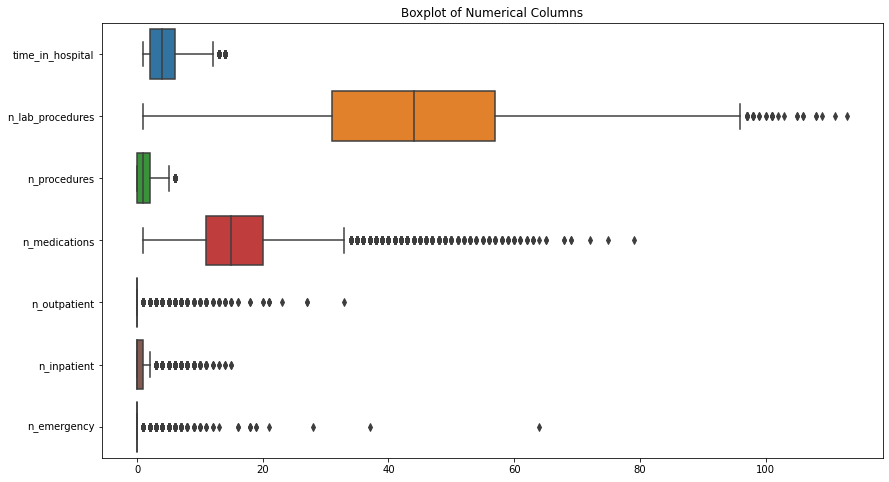

In [9]:
# Descriptive Statistics
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ["time_in_hospital", "n_lab_procedures", "n_procedures", 
                     "n_medications", "n_outpatient", "n_inpatient", "n_emergency"]

# Create boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[numerical_columns], orient="h")
plt.title("Boxplot of Numerical Columns")
plt.show()


### time_in_hospital:

###### The IQR (box) is compact, indicating most values are within a small range.
###### There are a few outliers, but the spread is small overall.
###### This suggests that most patients have short hospital stays (Less than 10 days).

### n_lab_procedures:

###### The box is much larger, showing that values for lab procedures vary widely.
###### The whiskers are long, and there are many outliers on the higher end.
###### This indicates that while most patients receive a moderate number of lab procedures, some patients receive very high numbers.

### n_procedures:

###### The box is small, and most data is concentrated around the lower range.
###### There are outliers, but the majority of the patients have fewer procedures.
###### This suggests that most patients undergo 0-2 procedures, with a few undergoing significantly more.

### n_medications:

###### The IQR is larger, and there are a high number of outliers.
###### The data is heavily skewed towards patients who received fewer medications, with extreme values for some patients.
###### This means most patients receive a smaller number of medications, but some are prescribed a very high number.

### n_outpatient:
###### The box is very small, indicating that most values are concentrated near 0.There are numerous outliers.(more than n_inpatient)

### n_inpatient: 
 ###### The box is very small, indicating that most values are concentrated near 0.There are numerous outliers.

### n_emergency:
###### The box is very small, indicating that most values are concentrated near 0.There are numerous outliers.


## Skewness: 
##### Many of the variables appear to be skewed to the right, with most values near the lower range and a few extreme high values (outliers).
## Outliers: 
##### Variables like n_lab_procedures, n_medications, and visit counts (n_outpatient, n_inpatient, n_emergency) have a large number of outliers.
## Variability: 
##### Variables like n_lab_procedures and n_medications show high variability (large IQR and spread).

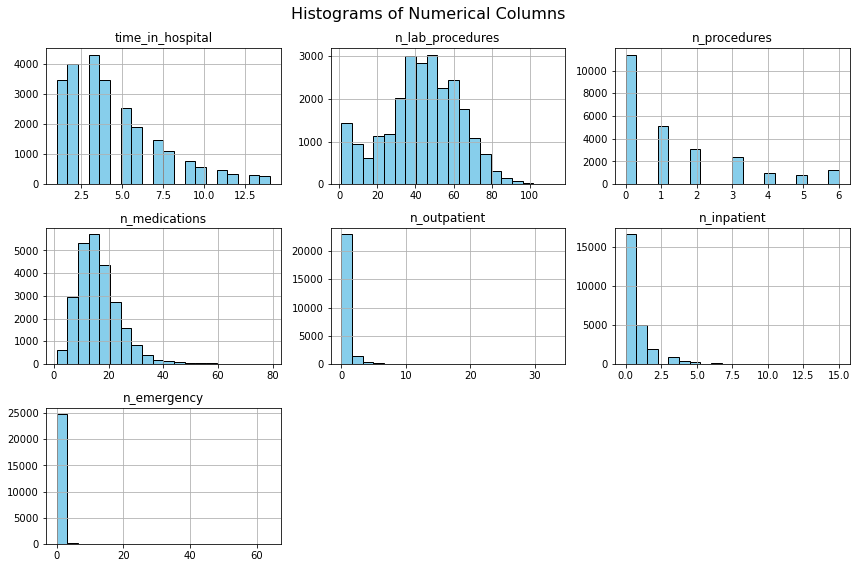

In [10]:
# Plot histograms for each column
data[numerical_columns].hist(bins=20, figsize=(12, 8), layout=(3, 3), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Columns", size=16)
plt.tight_layout()
plt.show()


## time_in_hospital:
    
##### The data is right-skewed (most values are on the left, tapering off to the right).
##### There is a concentration of smaller values, with fewer larger values.


## n_lab_procedures:
    
##### The data appears more normally distributed (bell-shaped).
##### Values are spread symmetrically around the center.
##### This suggests that the variable has a balanced spread. 

## n_procedures:
    
##### This histogram shows a strong right skew with many values near zero.
##### A few higher values appear as spikes, which could be outliers or uncommon high occurrences.


## n_medications:

##### The data is right-skewed and concentrated at smaller values.
##### There are very few higher values.

## n_outpatient:
    
##### This histogram shows an extreme right skew with nearly all values near zero.
##### Only a small number of higher values exist.

## n_inpatient
##### Similar to the n_lab_procedures histogram, this is highly right-skewed.
##### Most values are close to zero, but there are rare higher values.


## n_emergency
##### The distribution is extremely right-skewed, with almost all values concentrated at zero.
##### Very few occurrences exist for higher values.

This plot providing insights into their distributions and correlations.

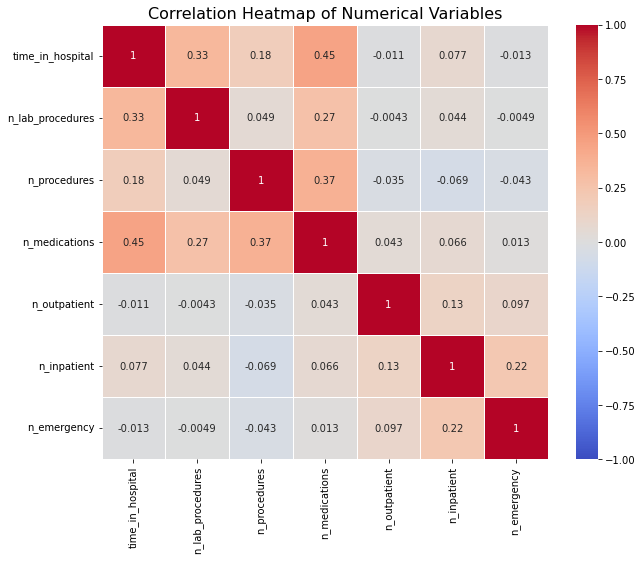

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust figure size

# Create a heatmap
sns.heatmap(correlation_matrix, 
            annot=True,             # Display correlation values
            cmap="coolwarm",        # Color palette: blue for negative, red for positive
            center=0,               # Center the color bar at 0
            linewidths=0.5,         # Add lines between cells
            vmin=-1, vmax=1)        # Fix color scale from -1 to 1

# Add a title
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)

# Show the plot
plt.show()


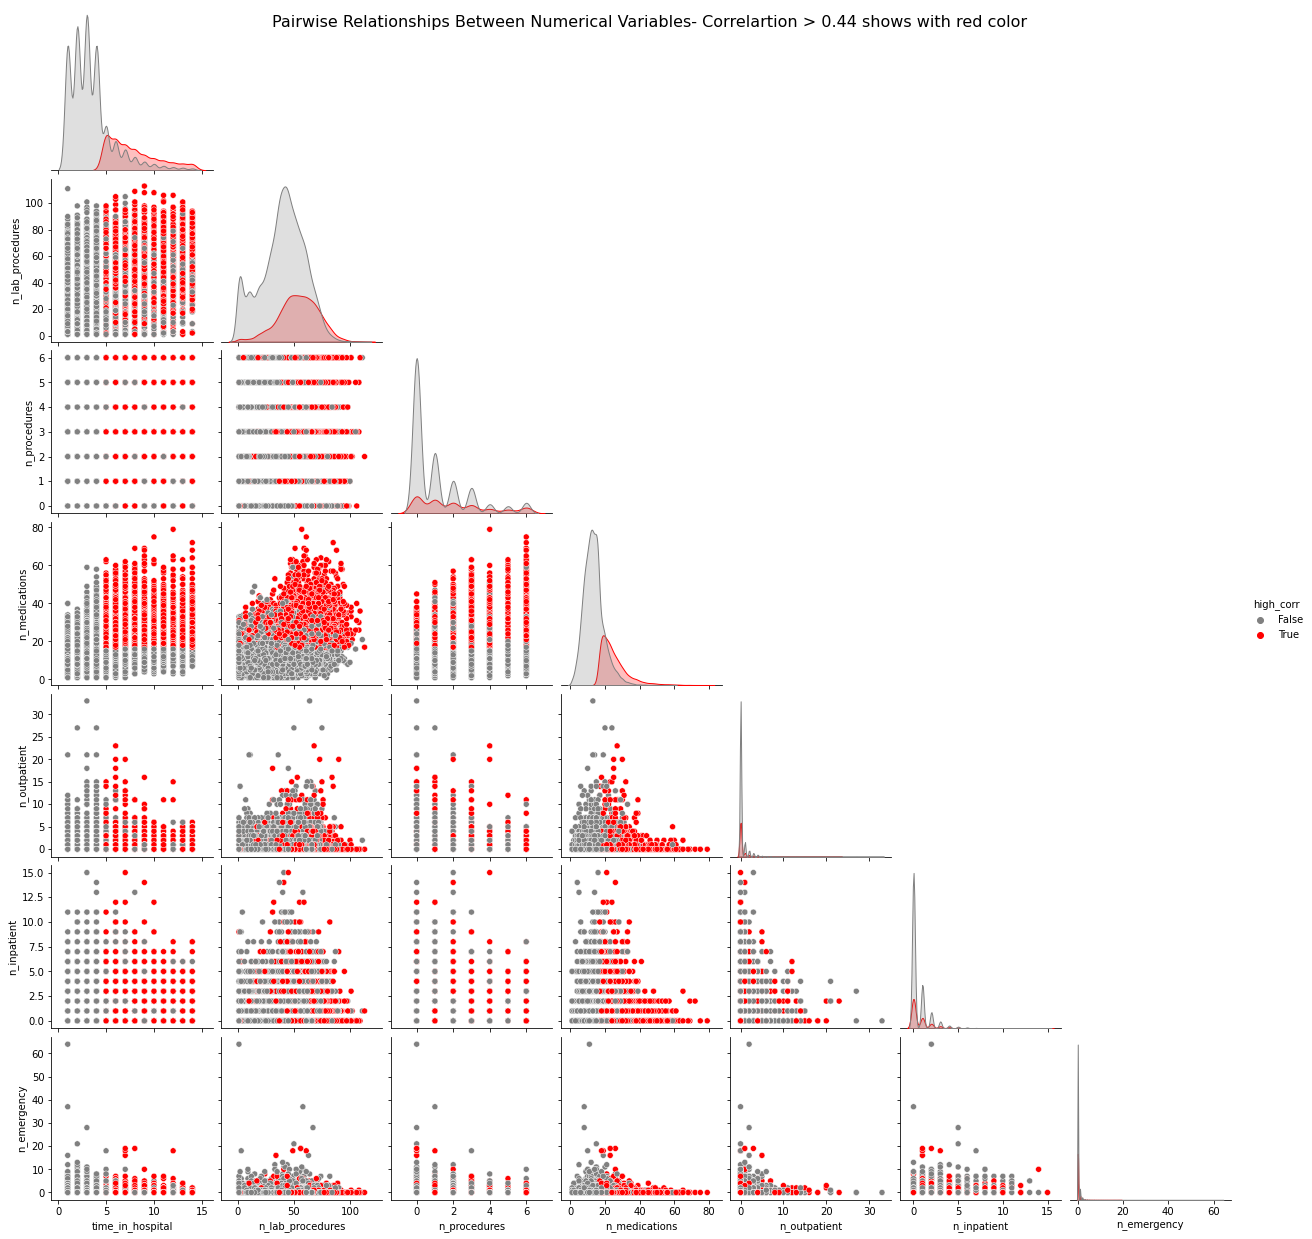

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame containing these columns
numerical_columns = ["time_in_hospital", "n_lab_procedures", "n_procedures", 
                     "n_medications", "n_outpatient", "n_inpatient", "n_emergency"]

# Compute correlation matrix
corr_matrix = data[numerical_columns].corr()

# Identify pairs with high correlation
threshold = 0.44
high_corr_pairs = [
    (i, j) for i in numerical_columns for j in numerical_columns
    if i != j and abs(corr_matrix.loc[i, j]) > threshold
]

# Create a column to highlight high correlations
data['high_corr'] = False  # Default is no high correlation

if high_corr_pairs:
    # Highlight rows involved in high correlation pairs
    for col1, col2 in high_corr_pairs:
        data['high_corr'] = data['high_corr'] | (
            (data[col1] > data[col1].mean()) & (data[col2] > data[col2].mean())
        )

# Pairplot with color for high correlation
pairplot = sns.pairplot(
    data=data,
    vars=numerical_columns,  # Use your actual numerical columns
    hue="high_corr",  # Use the 'high_corr' column for coloring
    kind="scatter",  # Use scatter for better visualization
    diag_kind="kde",  # Kernel density estimation for diagonals
    corner=True,  # Only plot lower triangle
    palette={True: "red", False: "gray"}  # Red for high correlation, gray otherwise
)

# Add title
plt.suptitle("Pairwise Relationships Between Numerical Variables- Correlartion > 0.44 shows with red color", size=16)
plt.show()


##### time_in_hospital and n_medications (correlation = 0.449415) show a moderate positive correlation.
This suggests that patients who stay longer in the hospital tend to have more medications.

Correlation Matrix:
                   time_in_hospital  n_lab_procedures  n_procedures  \
time_in_hospital          1.000000          0.328326      0.179249   
n_lab_procedures          0.328326          1.000000      0.048827   
n_procedures              0.179249          0.048827      1.000000   
n_medications             0.449415          0.271741      0.368681   
n_outpatient             -0.011309         -0.004309     -0.034796   
n_inpatient               0.076916          0.043713     -0.069078   
n_emergency              -0.013115         -0.004929     -0.042906   

                  n_medications  n_outpatient  n_inpatient  n_emergency  
time_in_hospital       0.449415     -0.011309     0.076916    -0.013115  
n_lab_procedures       0.271741     -0.004309     0.043713    -0.004929  
n_procedures           0.368681     -0.034796    -0.069078    -0.042906  
n_medications          1.000000      0.043185     0.065572     0.012944  
n_outpatient           0.043185      1.000000   

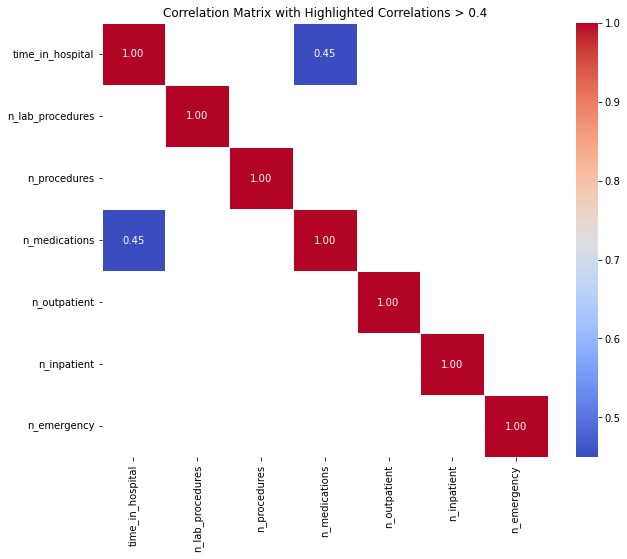

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the correlation matrix and high correlation pairs
print("Correlation Matrix:\n", corr_matrix)
print("High Correlation Pairs:", high_corr_pairs)

# Define the threshold for highlighting
highlight_threshold = 0.4

# Plot the heatmap with correlations greater than 0.4 highlighted
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,             # Display correlation values
    cmap="coolwarm",        # Color gradient
    mask=corr_matrix.abs() < highlight_threshold,  # Mask values below the threshold
    cbar=True,              # Show color bar
    fmt=".2f",              # Format correlation values
    linewidths=0.5          # Add gridlines between cells
)
plt.title("Correlation Matrix with Highlighted Correlations > 0.4")
plt.show()


### 1.Positive Correlations
###### time_in_hospital and n_medications (0.44):
<span style="font-size: 14px;">This indicates a moderate positive relationship, suggesting that longer hospital stays are associated with a higher number of medications administered.</span>
###### tn_procedures and n_medications (0.36):
<span style="font-size: 14px;">There is a moderate positive relationship here as well, meaning that more procedures tend to correspond with a higher number of medications.
###### time_in_hospital and n_lab_procedures (0.32):
<span style="font-size: 14px;">A weak-to-moderate positive relationship indicates that longer hospital stays are associated with more lab procedures.
###### n_inpatient and n_emergency (0.22):
<span style="font-size: 14px;">This weak positive correlation suggests that patients with more inpatient visits tend to have slightly more emergency visits.
### 2. Weak or Negligible Correlations
##### tn_outpatient and time_in_hospital (-0.011):
<span style="font-size: 14px;">Negligible correlation indicates no meaningful relationship between the number of outpatient visits and hospital stay length.
###### tn_procedures and n_emergency (-0.043):
###### Very weak negative correlation suggests no significant association between the number of procedures and emergency visits.
###### tn_lab_procedures and n_outpatient (-0.004):
<span style="font-size: 14px;">Essentially no relationship between these two variables.
### 3. Key Highlight: High Correlation Pairs
<span style="font-size: 14px;">ttime_in_hospital and n_medications (0.449):
<span style="font-size: 14px;">Among the given pairs, this is the strongest correlation. It underscores a meaningful relationship where patients staying longer in the hospital receive more medications.
#### Insights:
<span style="font-size: 14px;">Variables related to hospital stays (e.g., time_in_hospital) tend to have stronger relationships with clinical procedures (n_lab_procedures, n_procedures) and medications (n_medications).
<span style="font-size: 14px;">Outpatient and emergency metrics (n_outpatient, n_emergency) generally show weak correlations with most other variables, potentially indicating that they measure different aspects of patient care.

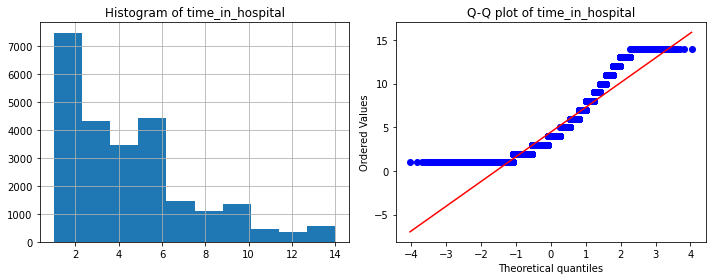

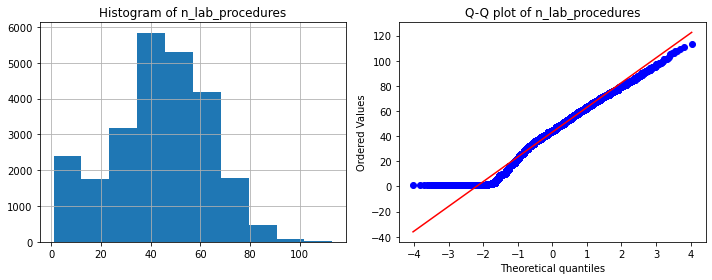

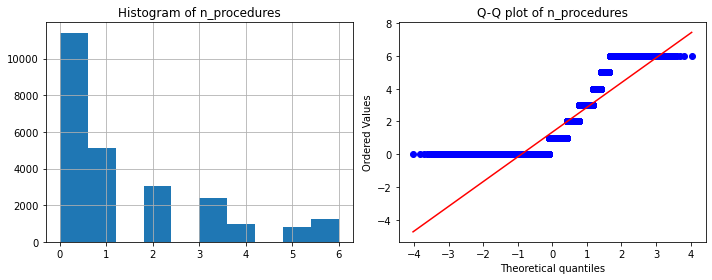

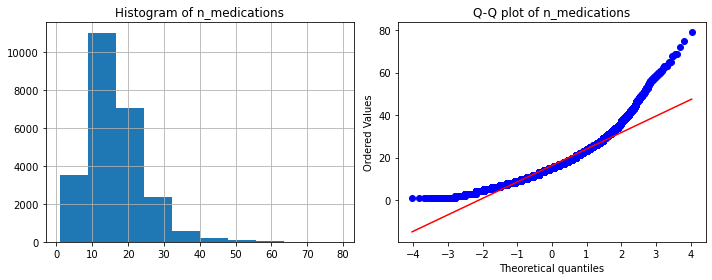

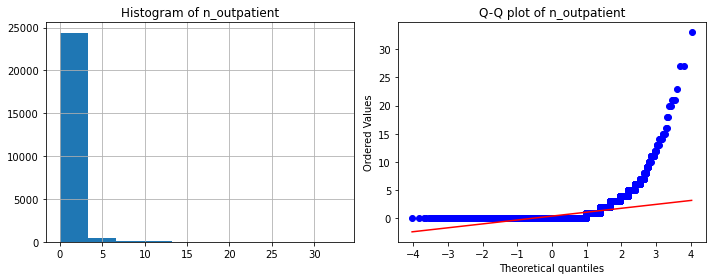

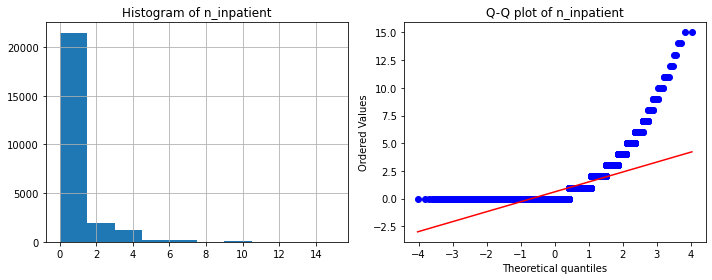

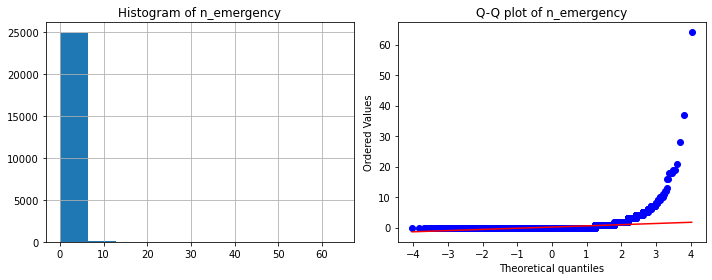

In [14]:
#3- Distribution analysis
numerical_columns=data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    data[col].hist()
    plt.title(f'Histogram of {col}')
    plt.subplot(122)
    stats.probplot(data[col], dist="norm",plot=plt)
    plt.title(f'Q-Q plot of {col}')
    plt.tight_layout()
    plt.show()

#### time_in_hospital:
<span style="font-size: 14px;">The data shows some deviation from normality, particularly in the tails.</span>

#### n_lab_procedures
<span style="font-size: 14px;"> Both the histogram and Q-Q plot confirm that n_lab_procedures is not normally distributed due to the right skew and heavy tail.
<span style="font-size: 14px;">The distribution shows positive skewness, with a small number of patients receiving a much higher number of lab procedures.
<span style="font-size: 14px;"> Observations at the upper end of the histogram and Q-Q plot suggest the potential for outliers.

#### n_procedures
<span style="font-size: 14px;"> The "stepped" pattern in the Q-Q plot is due to the discrete nature of n_procedures, with many identical values (e.g., 0, 1, 2, etc.).
<span style="font-size: 14px;">Both the histogram and Q-Q plot indicate that n_procedures is heavily skewed to the right, with a concentration of low values.
<span style="font-size: 14px;"> The data is not normally distributed due to the skewness and discrete values, as shown by the deviations in the Q-Q plot.
<span style="font-size: 14px;"> The variable is count-based (number of procedures), leading to the stepped pattern in the Q-Q plot and the discrete nature of the histogram.










# Correlation Analysis


<span style="font-size: 14px;"> The data shows some deviation from normality, particularly in the tails.

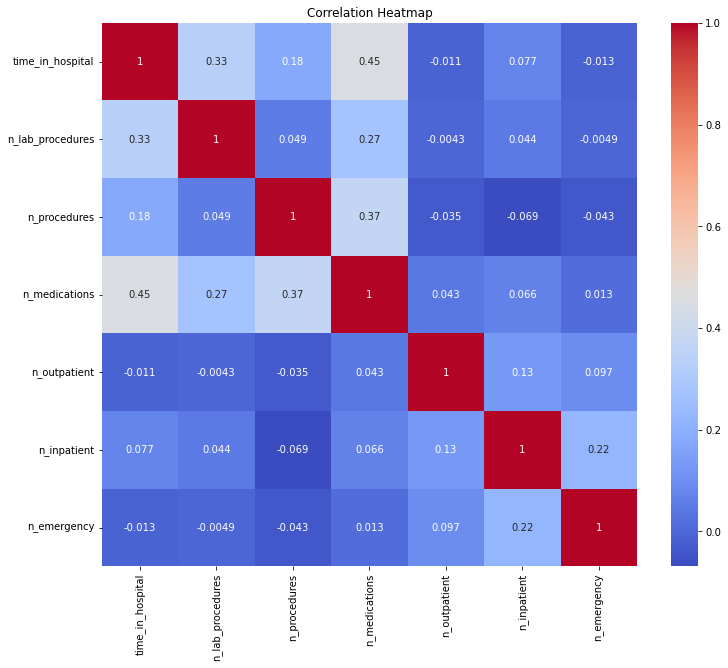

In [15]:
#4- Correlation analysis

corr_matrix=data[numerical_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
    

# Target Variable Analysis


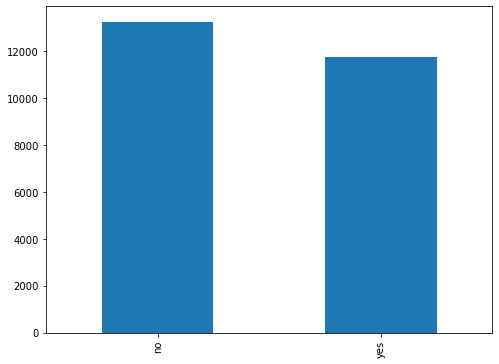

In [16]:
#5- Target variable analysis

if 'readmitted' in data.columns:
    plt.figure(figsize=(8,6))
    data['readmitted'].value_counts().plot(kind='bar')
    plt.show()
else:
    print("No readmitted column in dataframe")

In [17]:
# Feature Relationship

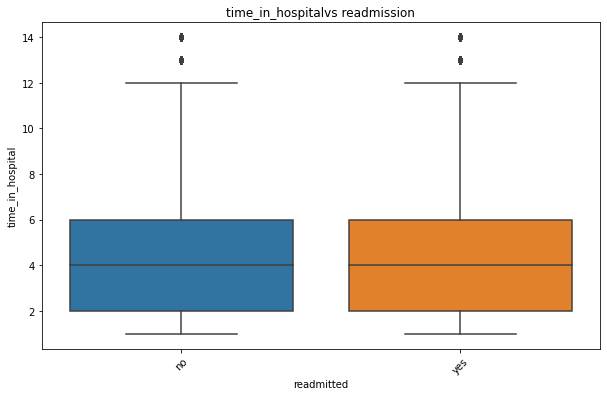

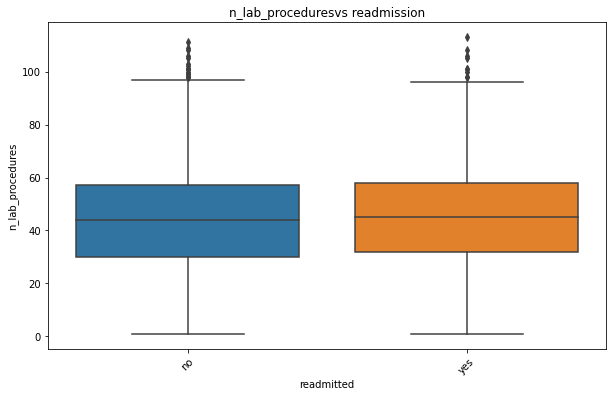

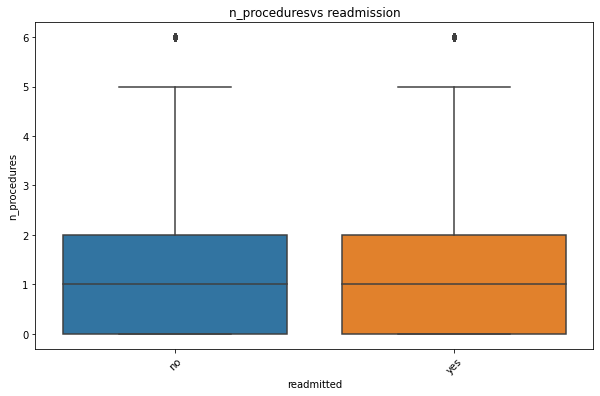

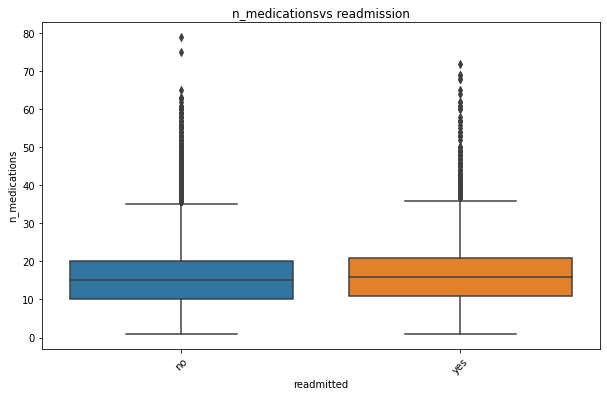

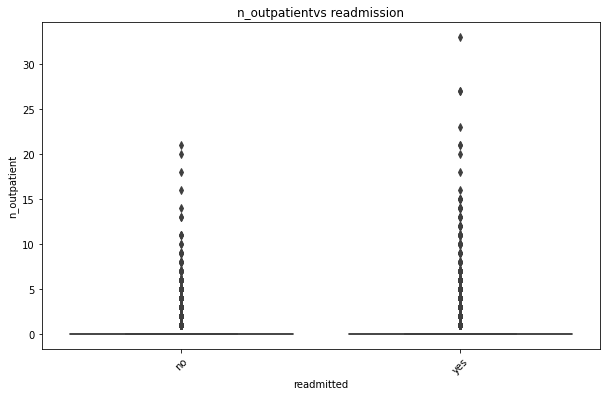

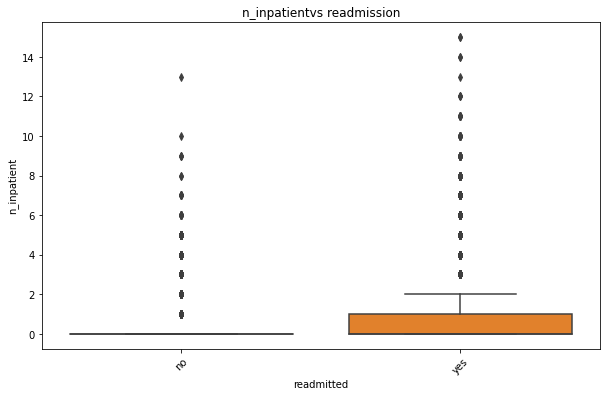

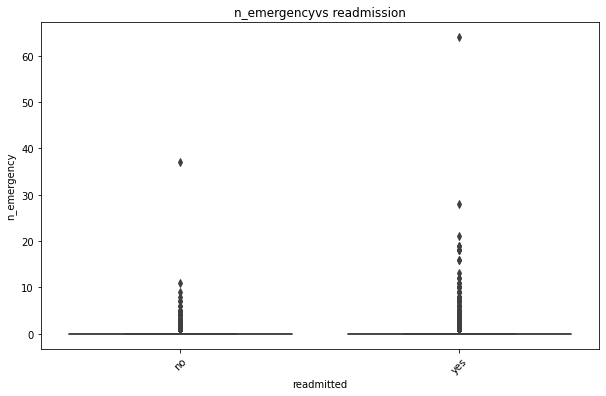

In [18]:


if 'readmitted' in data.columns:
    for col in numerical_columns:
        if col!='readmitted':
            plt.figure(figsize=(10,6))
            sns.boxplot(x='readmitted',y=col,data=data)
            plt.title(f'{col}vs readmission')
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("No column found")
            

age


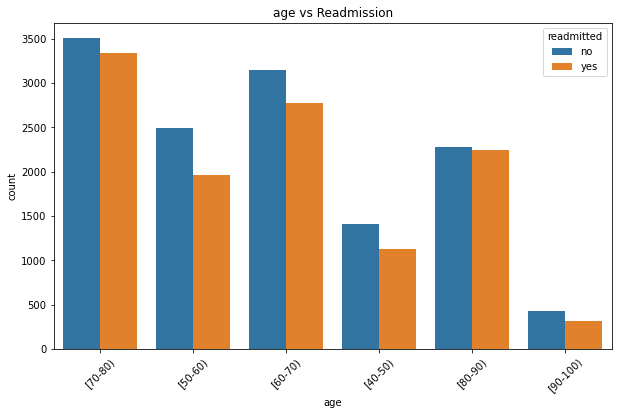

medical_specialty


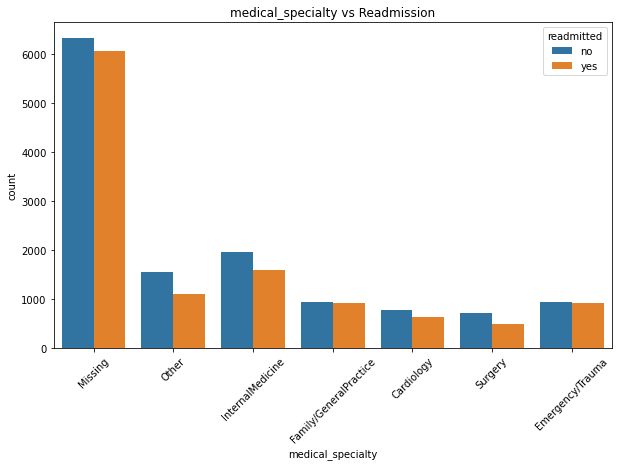

diag_1


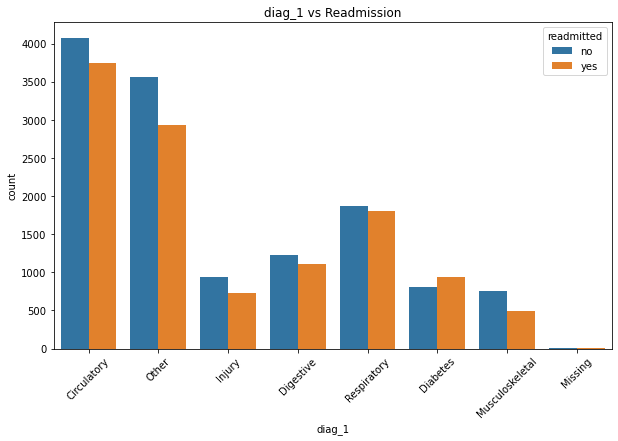

diag_2


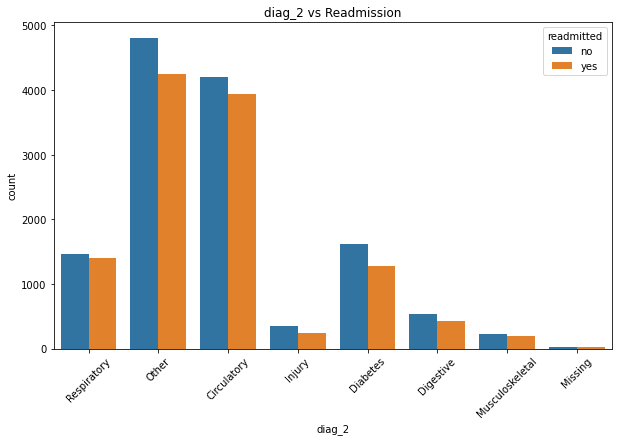

diag_3


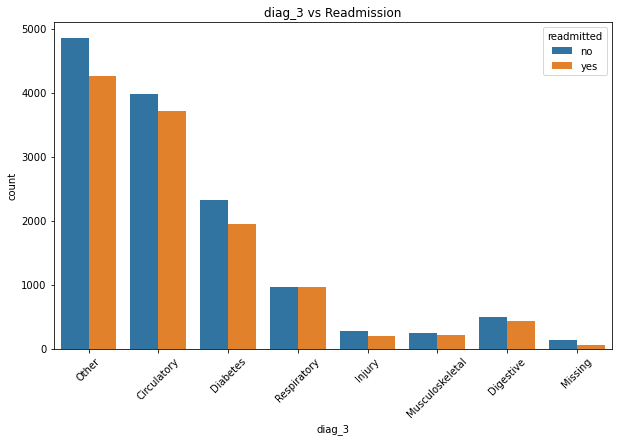

glucose_test


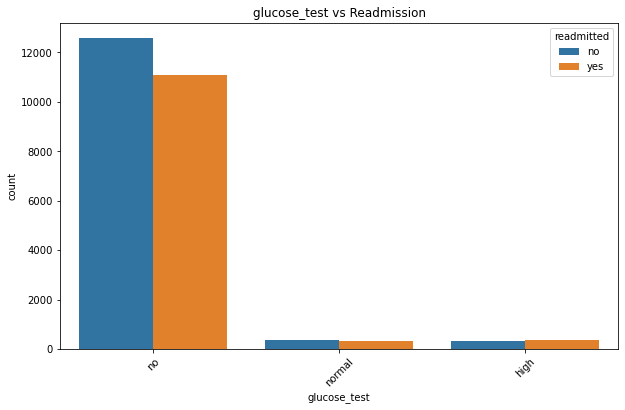

A1Ctest


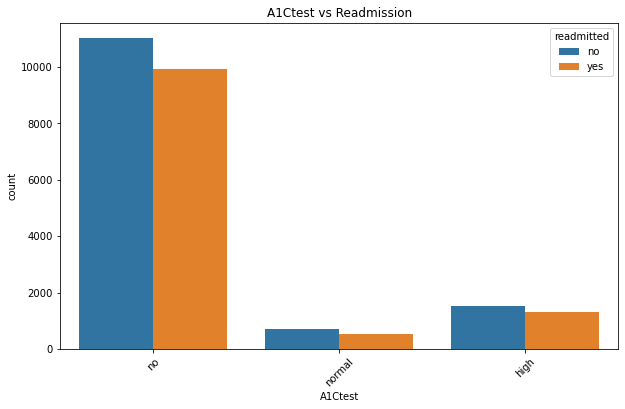

change


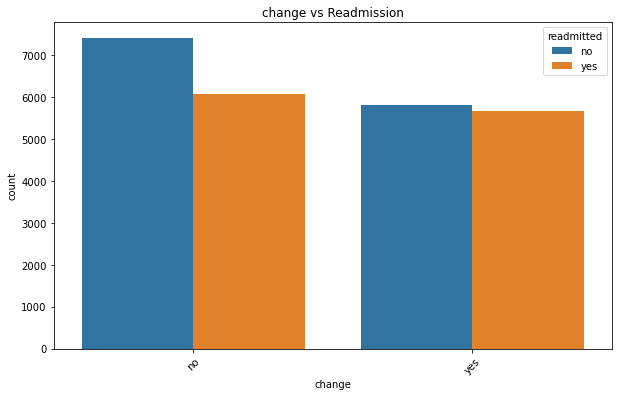

diabetes_med


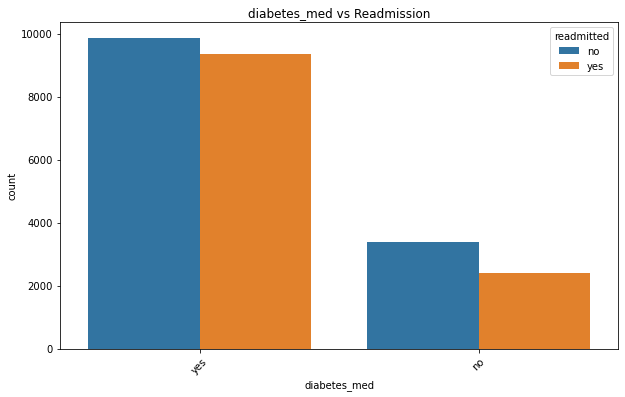

readmitted


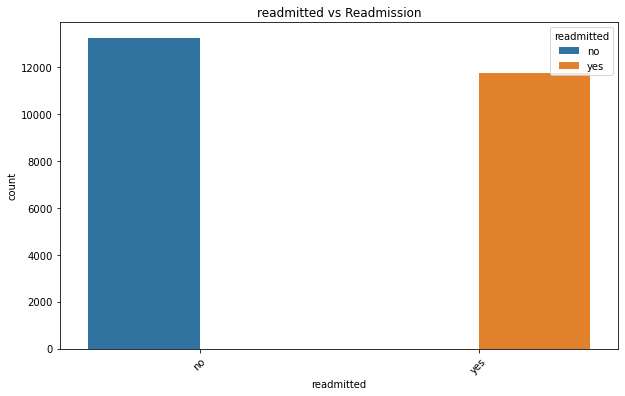

No readmitted column


In [19]:
categorical_column=data.select_dtypes(include=['object']).columns
for col in categorical_column:
    print(col)
    
    plt.figure(figsize=(10,6)) 
    sns.countplot(x=col, hue='readmitted',data=data)
    plt.title(f'{col} vs Readmission')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No readmitted column")

# Multivariate Analysis


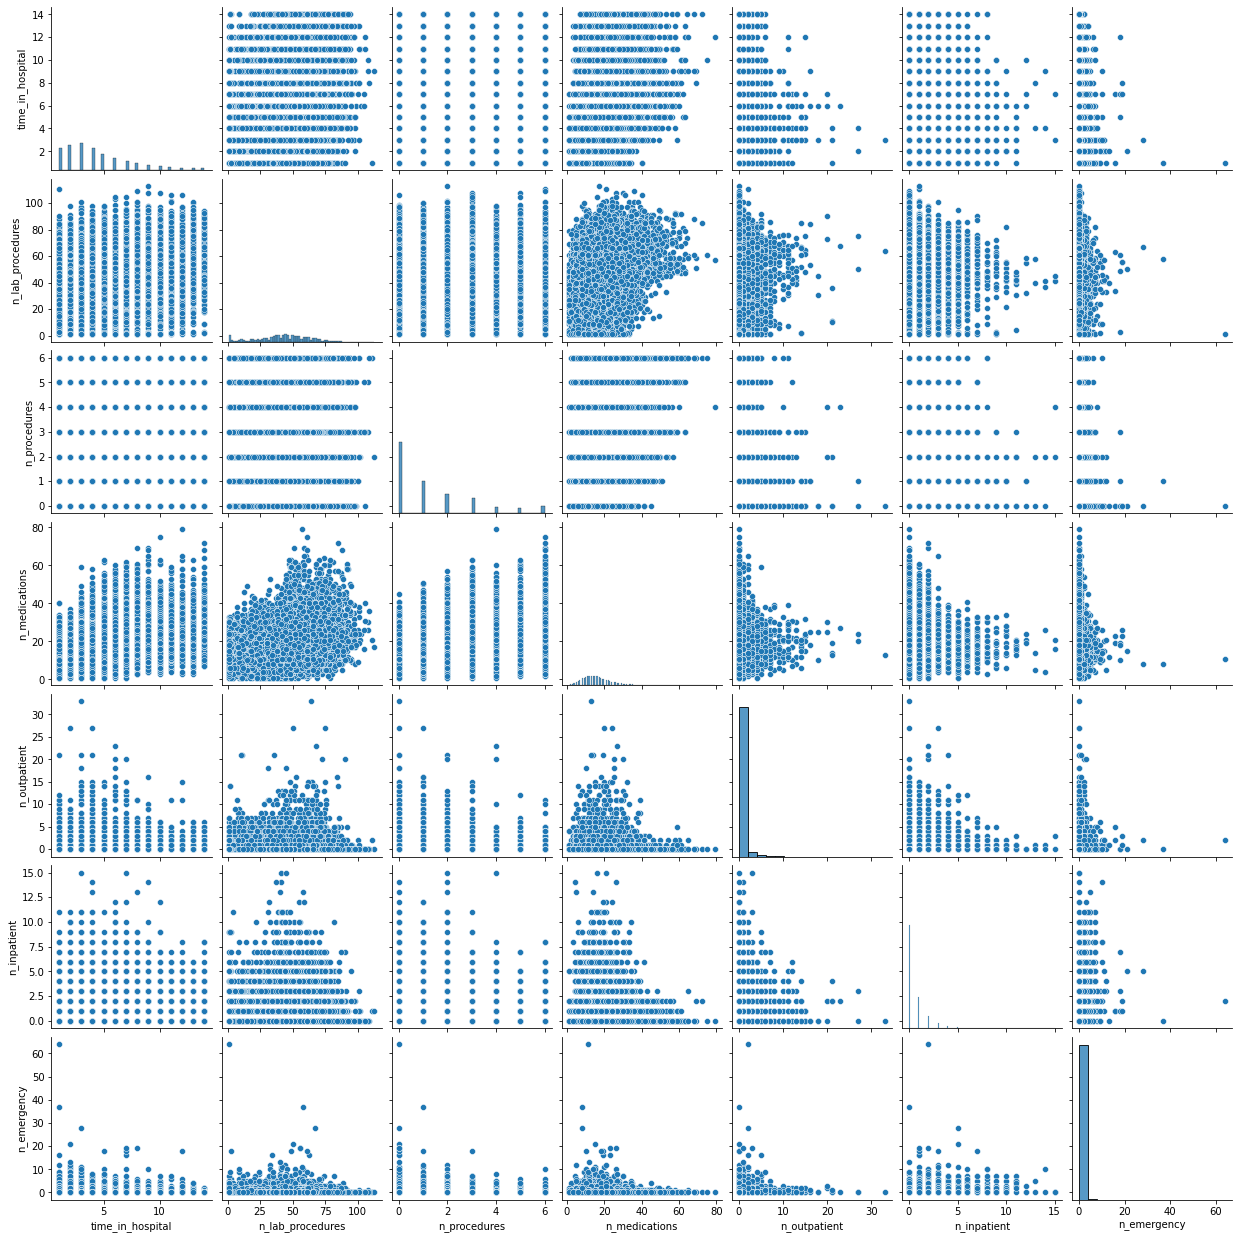

In [20]:
sns.pairplot(data[numerical_columns])
plt.show()

# Define Numerical and Categorical Columns
